# 训练XGBoost模型

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection  import train_test_split
import xgboost as xgb

ZHFONT = matplotlib.font_manager.FontProperties(fname="data/SourceHanSansSC-Regular.otf")

df_train = pd.read_csv("data/train_new_2.csv")

## 划分数据集

In [2]:
# 划分数据集
targets = df_train.pop('target')

train_data, val_data, train_targets, val_targets = train_test_split(df_train, targets, test_size = 0.2)

## 模型训练

In [3]:
# 创建DMatrix数据结构
dtrain = xgb.DMatrix(train_data, label=train_targets)
dval = xgb.DMatrix(val_data, label=val_targets)

# 设置模型超参数
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 10,
    'min_child_weight': 10,
}
EPOCH_NUM = 100

# 训练模型
evals_result = {}
bst = xgb.train(params, dtrain, EPOCH_NUM, [(dval, 'eval')], evals_result=evals_result)

/root/miniconda3/envs/bi/lib/python3.13/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	eval-logloss:0.67779
[1]	eval-logloss:0.66509
[2]	eval-logloss:0.65456
[3]	eval-logloss:0.64561
[4]	eval-logloss:0.63801
[5]	eval-logloss:0.63154
[6]	eval-logloss:0.62601
[7]	eval-logloss:0.62123
[8]	eval-logloss:0.61705
[9]	eval-logloss:0.61344
[10]	eval-logloss:0.61013
[11]	eval-logloss:0.60727
[12]	eval-logloss:0.60482
[13]	eval-logloss:0.60251
[14]	eval-logloss:0.60051
[15]	eval-logloss:0.59867
[16]	eval-logloss:0.59703
[17]	eval-logloss:0.59547
[18]	eval-logloss:0.59403
[19]	eval-logloss:0.59265
[20]	eval-logloss:0.59145
[21]	eval-logloss:0.59036
[22]	eval-logloss:0.58913
[23]	eval-logloss:0.58799
[24]	eval-logloss:0.58696
[25]	eval-logloss:0.58606
[26]	eval-logloss:0.58515
[27]	eval-logloss:0.58419
[28]	eval-logloss:0.58341
[29]	eval-logloss:0.58268
[30]	eval-logloss:0.58178
[31]	eval-logloss:0.58100
[32]	eval-logloss:0.58044
[33]	eval-logloss:0.57969
[34]	eval-logloss:0.57902
[35]	eval-logloss:0.57830
[36]	eval-logloss:0.57773
[37]	eval-logloss:0.57699
[38]	eval-logloss:0.57

{'eval': OrderedDict({'logloss': [0.6777924848025322, 0.6650865077611997, 0.6545572597817488, 0.6456075131780832, 0.6380096073612208, 0.6315404513089156, 0.6260050314110844, 0.6212320238195251, 0.6170519322331659, 0.6134351673369792, 0.6101261181177707, 0.6072661320901327, 0.6048175199681247, 0.6025136207114723, 0.6005114196105716, 0.598673743426782, 0.5970273624195617, 0.595470492803495, 0.5940312153356146, 0.5926543955448115, 0.5914489778315136, 0.5903615699279994, 0.5891310223628571, 0.5879902097956273, 0.5869607969014095, 0.5860563933083958, 0.5851462614327885, 0.5841945642911935, 0.5834091897483034, 0.5826754248947262, 0.5817816706470313, 0.5810037701328289, 0.5804353838279157, 0.5796908810329863, 0.5790220333087831, 0.5783025872443359, 0.5777327739468381, 0.5769949818432525, 0.5763827260152616, 0.5756941277990425, 0.5752339481770802, 0.5746673565108421, 0.5742909825401066, 0.5738196619177964, 0.5732871228404379, 0.5726872075045396, 0.5722993179780199, 0.5717511010152005, 0.571215

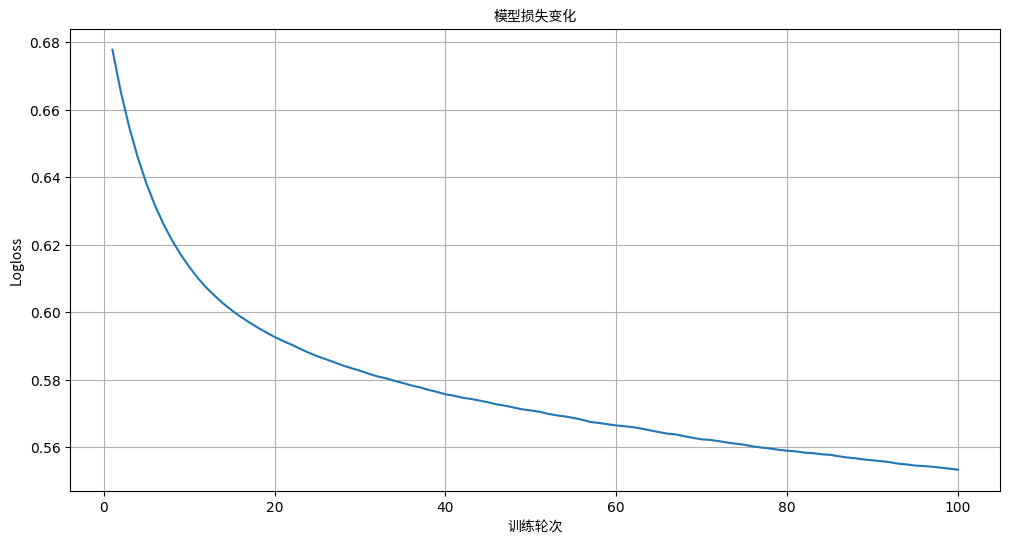

In [4]:
# 可视化训练过程中的loss
print(evals_result)
# 获取logloss
loss_result = evals_result['eval']['logloss']
# 绘制损失折线图
plt.figure(figsize=(12, 6))
plt.plot(range(1, EPOCH_NUM + 1), loss_result)
plt.title('模型损失变化',fontproperties=ZHFONT)
plt.xlabel('训练轮次',fontproperties=ZHFONT)
plt.ylabel('Logloss',fontproperties=ZHFONT)
plt.grid()
plt.show()

In [8]:
# 在val数据集上模型评估
from sklearn.metrics import roc_auc_score
pred = bst.predict(dval)
predicted_classes = [1 if i > 0.5 else 0 for i in pred]

# 计算准确率
accuracy = classification_report(val_targets, predicted_classes)
print(accuracy)
# 计算AUC分数
auc = roc_auc_score(val_targets, predicted_classes)
print(f'AUC: {auc:.2f}')

              precision    recall  f1-score   support

           0       0.71      0.73      0.72    366185
           1       0.73      0.70      0.71    371400

    accuracy                           0.72    737585
   macro avg       0.72      0.72      0.72    737585
weighted avg       0.72      0.72      0.72    737585

AUC: 0.72
